In [1]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100


In [2]:
train = pd.read_csv("cs-training.csv")


## EXPLORATORY DATA ANALYSIS(EDA)

**CHECK HOW OUR DATASET  APPEARS**

In [3]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**CHECKING DISTRIBUTION OF OUR DATASET IN ROWS AND COLUMNS**

In [4]:
train.shape

(150000, 12)

**LET'S UNDERSTAND DISTRIBUTION OF OUR NUMERICAL DATA IN OUR DATASET**

In [5]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

SeriousDlqin2yrs is the target variable (label), it is binary.

The training set contains 150,000 observations of 11 features and 1 label.

All of our features are numerical in nature.

NumberOfDependents and MonthlyIncome contain NaN values, we also suspect that other variables contains errors (Age).

## TARGET DISTRIBUTION

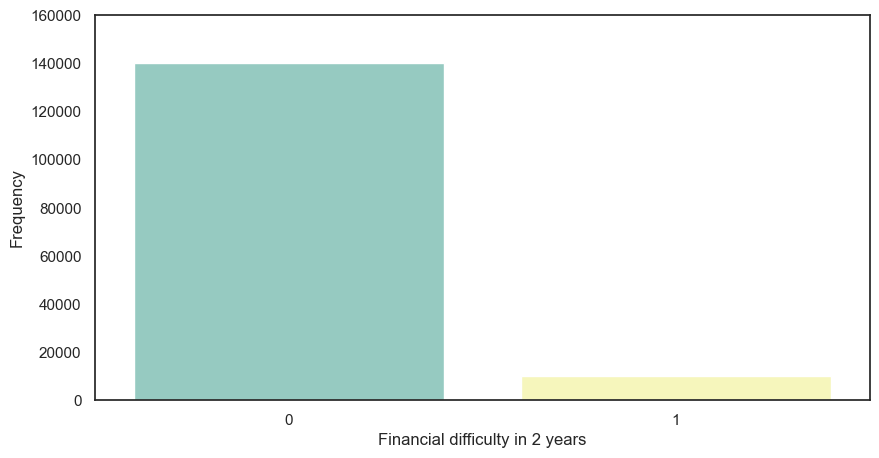

In [8]:
ax = sns.countplot(x = train.SeriousDlqin2yrs ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Financial difficulty in 2 years')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

**We can see that the distribution of our target variable is very skewed, leaning more to the left having a longer tail (more non defaulters than defaulters)**

## Detecting outliers

In [9]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(train,2,["RevolvingUtilizationOfUnsecuredLines",
                                            "age",
                                            "NumberOfTime30-59DaysPastDueNotWorse",
                                            "DebtRatio",
                                            "MonthlyIncome",
                                            "NumberOfOpenCreditLinesAndLoans",
                                            "NumberOfTimes90DaysLate",
                                            "NumberRealEstateLoansOrLines",
                                            "NumberOfTime60-89DaysPastDueNotWorse",
                                            "Unnamed: 0",
                                            "NumberOfDependents"])

**from the above we can see the code returned outliers in our data and stores them in the 'Outliers_to_drop' variable**

In [10]:
train.loc[Outliers_to_drop]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
900,901,0,2.258964,33,2,0.032484,2000.0,1,1,0,0,2.0
919,920,1,1.362142,73,1,274.000000,NaN,2,3,0,1,NaN
1958,1959,0,1.634551,28,0,151.000000,NaN,1,3,0,2,0.0
4852,4853,0,1.566866,46,2,0.104983,6000.0,3,2,0,0,0.0
5956,5957,0,2.237856,60,6,2597.000000,1.0,16,1,2,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117338,117339,1,0.960692,42,0,1.241580,3770.0,29,1,2,1,3.0
126682,126683,1,0.344297,38,0,1.789158,4500.0,23,14,11,1,0.0
129570,129571,0,0.075067,58,0,0.298925,17388.0,24,0,6,1,0.0
5833,5834,1,0.917527,44,0,1.852144,3800.0,13,1,7,1,1.0


**Outliers_to_drop: This is the list of indices that you obtained earlier using the detect_outliers function. These indices represent the rows in your DataFrame that are considered outliers according to the specified threshold and features.**

**train.loc[Outliers_to_drop]: This line of code uses the .loc[] indexer in pandas to select rows from the 'train' DataFrame based on the indices in the 'Outliers_to_drop' list. It retrieves all the rows that correspond to the detected outliers**

**let us see what percentage of our dataset are the outliers**

In [11]:
3527/150000*100

2.3513333333333333

In [12]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

**Let us rename our columns to make them easy to understand when executing the model**

In [13]:
train = train.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Target',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'PropLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Deps'})

## Let's explore our Variables

## let's check correlation.

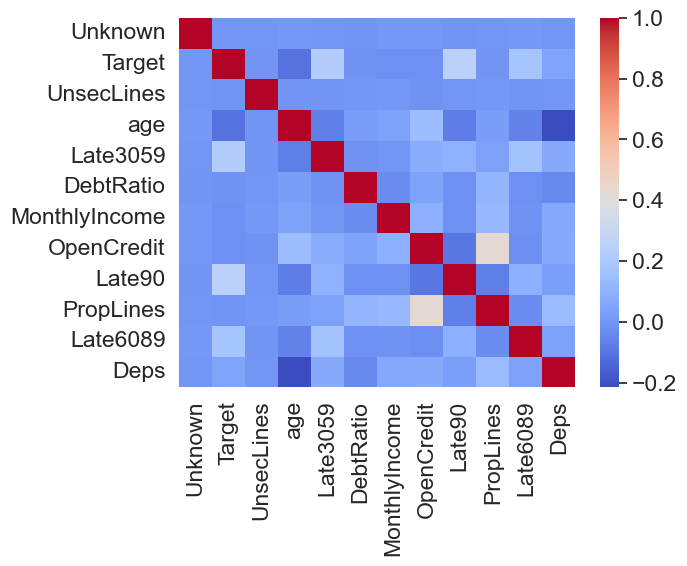

In [14]:
# Correlation matrix
g = sns.heatmap(train.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

**We can see that the Target has the highest correlation with age, previous late payments, and the number of dependants.**

## Exploring UnsecLines

In [15]:
train.UnsecLines.describe()

count    146473.000000
mean          5.933029
std         249.407744
min           0.000000
25%           0.028876
50%           0.146277
75%           0.530833
max       50708.000000
Name: UnsecLines, dtype: float64

**By executing theabove  code, you are essentially transforming the continuous values in the 'UnsecLines' column into discrete categories (bin labels) based on quantiles. The values in the 'UnsecLines' column will now represent the bin to which each original value belongs.**

**This discretization can be useful in some machine learning tasks, especially when you want to treat a continuous variable as a categorical one or when you want to reduce the impact of outliers.**

In [16]:
train.UnsecLines = pd.qcut(train.UnsecLines.values, 5).codes

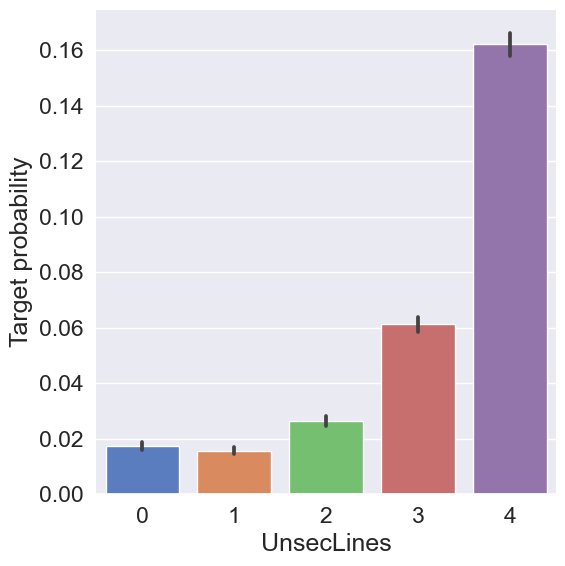

In [17]:
# Explore UnsecLines feature vs Target
g = sns.catplot(x="UnsecLines", y="Target", data=train, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")


We can see that there is an almost exponential relationship between this variable and our target.

**LET'S EXPLORE SOME FEATURES**

## Exploring Age

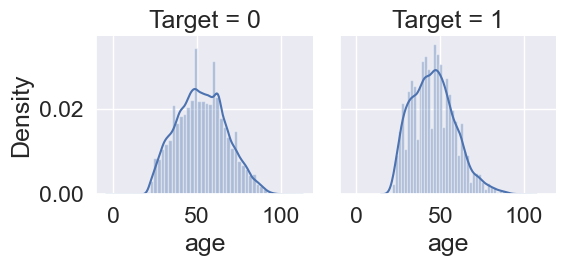

In [18]:
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Target')
g = g.map(sns.distplot, "age")

**From the above plots we can seee and maybe passively conclude that people aged between 0 to 50 are likely to experience financial delinquency in the next 90  days which is the vice vasa state considering persons aged between 50-100 years**

In [19]:
train.age = pd.qcut(train.age.values, 5).codes

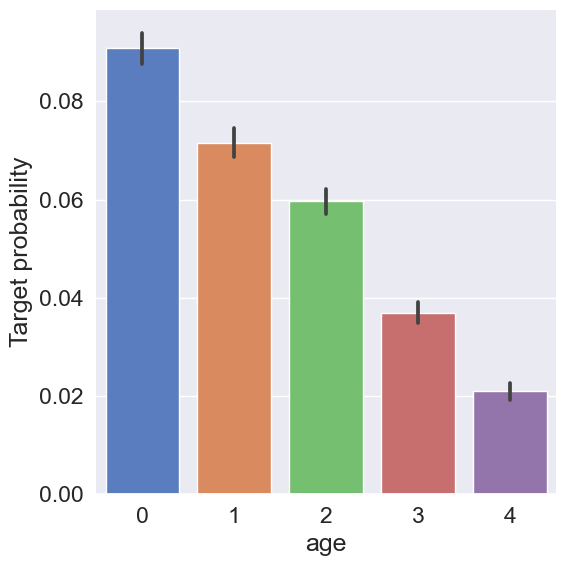

In [20]:
# Explore age feature vs Target
g = sns.catplot(x="age", y="Target", data=train, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")


We can see that age has an inverse relationship to default risk
Inverse Relationship: Indicates that as one variable (in this case, age) increases, the other variable (default risk) tends to decrease, and vice versa.
there is a trend or pattern that older individuals are less likely to default on their financial commitments compared to younger individuals. In other words, older age is associated with lower default risk. 

## Exploring Late3059

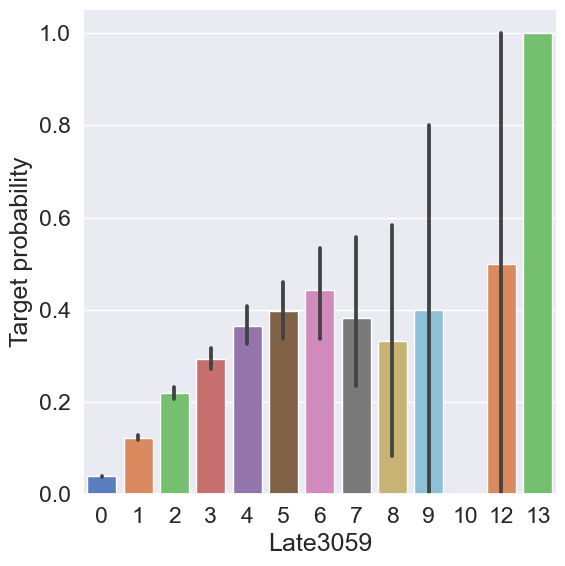

In [21]:
# Explore Late3059 feature vs Target
g = sns.catplot(x="Late3059", y="Target", data=train, kind="bar", height=6, palette="muted")
g.despine(left=True)
g.set_ylabels("Target probability")


In [22]:
for i in range(len(train)):
    if train.Late3059[i] >= 6:
        train.Late3059[i] = 6

**this code is used to cap or limit the values in the 'Late3059' column to a maximum of 6. If any value in that column is 6 or higher, it is set to 6. This operation can be useful for data preprocessing and cleaning, especially when you want to impose certain constraints on the data or handle outliers by limiting extreme values.**

Text(0, 0.5, 'Target probability')

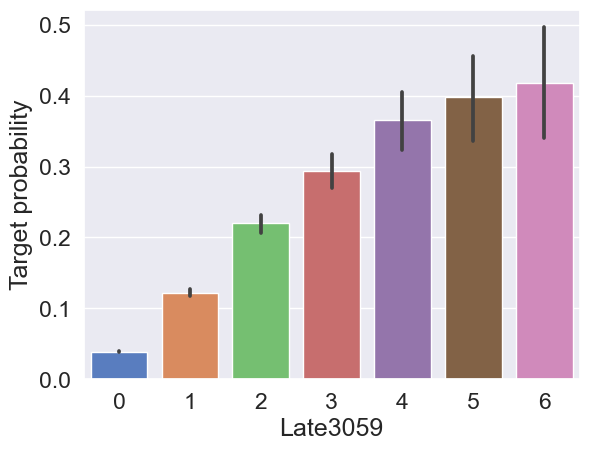

In [23]:
# Explore Late3059 feature vs Target
g = sns.barplot(x="Late3059", y="Target", data=train, palette="muted")
g.set_xlabel("Late3059")
g.set_ylabel("Target probability")


Due to very high standard deviations we decided to group customers who have 6 or more late payments together. We can see that this has boosted the predictive capacity and reduced the variance of Late3059

## Exploring DebtRatio

In [24]:
train.DebtRatio = pd.qcut(train.DebtRatio.values, 5).codes

Text(0, 0.5, 'Target probability')

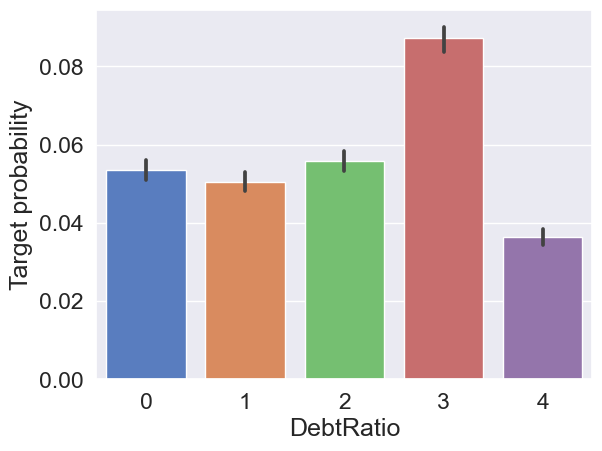

In [25]:
# Explore DebtRatio feature quantiles vs Target
g = sns.barplot(x="DebtRatio", y="Target", data=train, palette="muted")
g.set_xlabel("DebtRatio")
g.set_ylabel("Target probability")


## Exploring MonthlyIncome

In [26]:
train.MonthlyIncome.isnull().sum()

28249

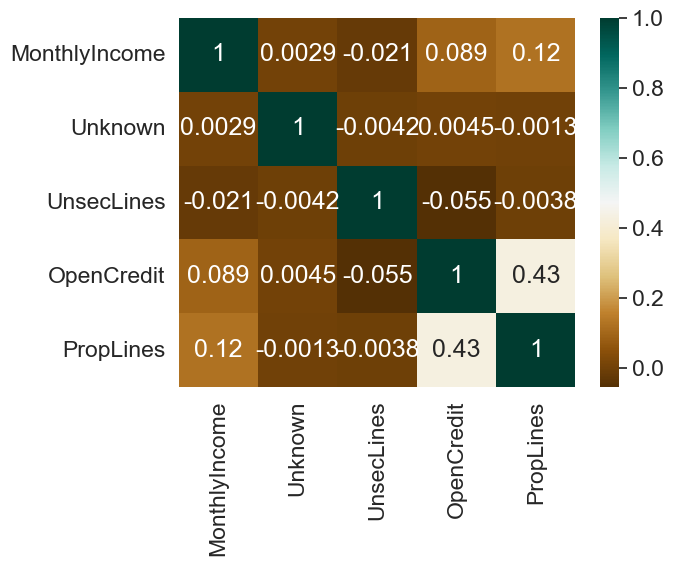

In [27]:
g = sns.heatmap(train[["MonthlyIncome","Unknown","UnsecLines","OpenCredit","PropLines"]].corr(),cmap="BrBG",annot=True)

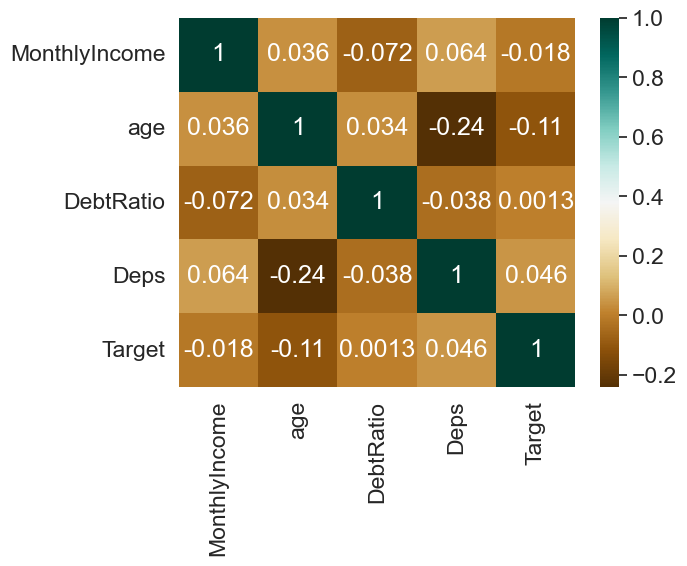

In [28]:
g = sns.heatmap(train[["MonthlyIncome","age","DebtRatio","Deps","Target"]].corr(),cmap="BrBG",annot=True)

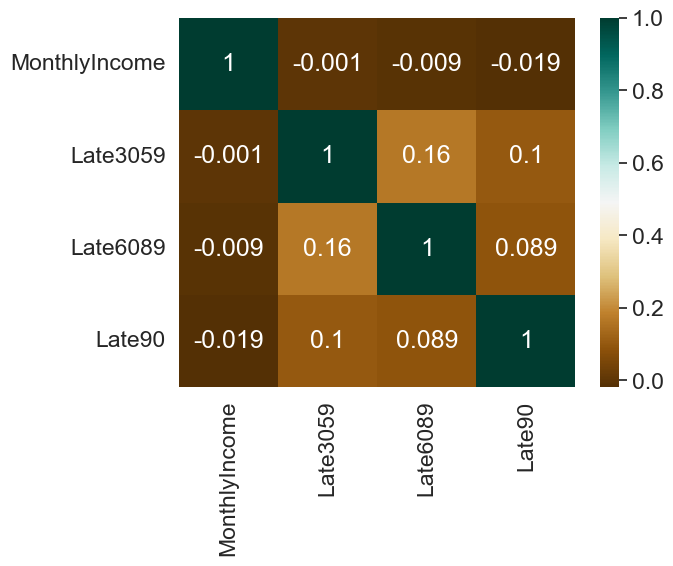

In [29]:
g = sns.heatmap(train[["MonthlyIncome","Late3059","Late6089","Late90"]].corr(),cmap="BrBG",annot=True)

We can see that MonthlyIncome has no strong correlation with any other variable so we cannot accurately estimate the NaN values. Thus, we will fill the NaN with the median value

In [30]:
train.MonthlyIncome.median()

5416.0

In [31]:
#Fill Embarked nan values of train set with 'S' most frequent value
train.MonthlyIncome = train.MonthlyIncome.fillna(train.MonthlyIncome.median())

In [32]:
train.MonthlyIncome = pd.qcut(train.MonthlyIncome.values, 4).codes

Text(0, 0.5, 'Target probability')

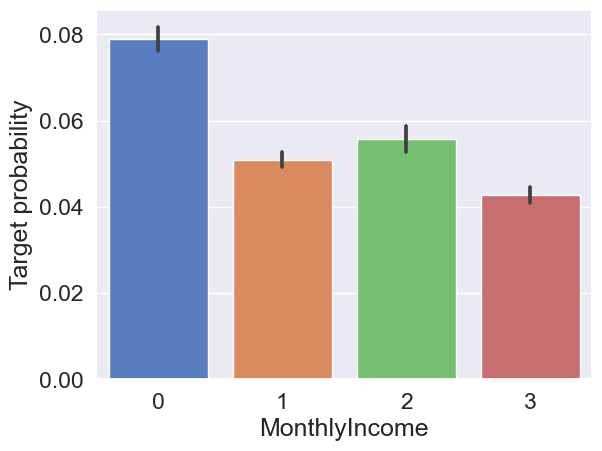

In [33]:
# Explore MonthlyIncome feature quantiles vs Target
g = sns.barplot(x="MonthlyIncome", y="Target", data=train, palette="muted")
g.set_xlabel("MonthlyIncome")
g.set_ylabel("Target probability")



## Exploring OpenCredit

In [34]:
train.OpenCredit.describe()

count    146473.000000
mean          8.460290
std           5.086106
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          57.000000
Name: OpenCredit, dtype: float64

In [35]:
train.OpenCredit = pd.qcut(train.OpenCredit.values, 5).codes

Text(0, 0.5, 'Target probability')

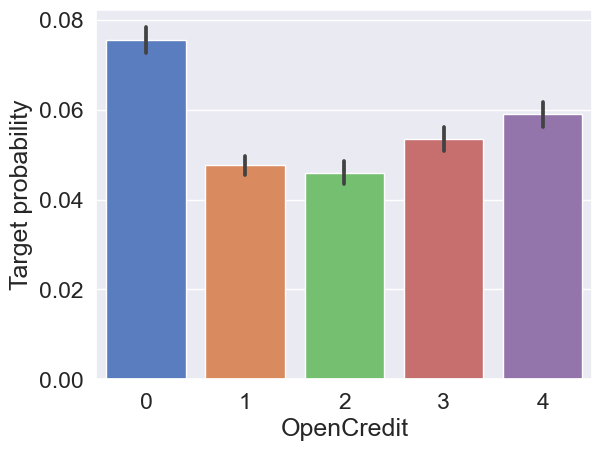

In [36]:
# Explore OpenCredit feature quantiles vs Target
g = sns.barplot(x="OpenCredit", y="Target", data=train, palette="muted")
g.set_xlabel("OpenCredit")
g.set_ylabel("Target probability")


## Exploring Late90

In [37]:
train.Late90.describe()

count    146473.000000
mean          0.060018
std           0.378964
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          17.000000
Name: Late90, dtype: float64

Text(0, 0.5, 'Target probability')

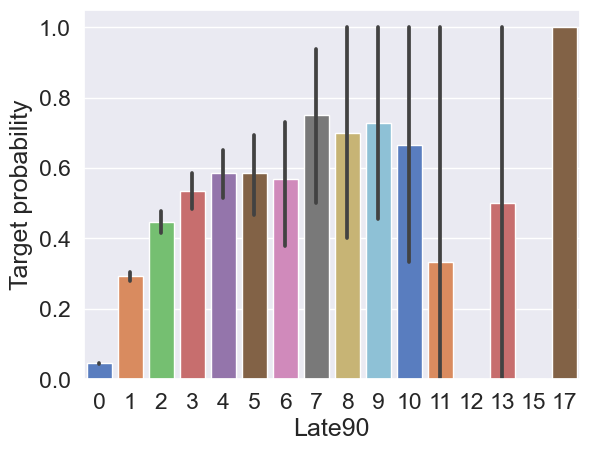

In [38]:
# Explore Late90 feature quantiles vs Target
g = sns.barplot(x="Late90", y="Target", data=train, palette="muted")
g.set_xlabel("Late90")
g.set_ylabel("Target probability")


In [39]:
for i in range(len(train)):
    if train.Late90[i] >= 5:
        train.Late90[i] = 5


Text(0.5, 1.0, 'Late90 vs Target')

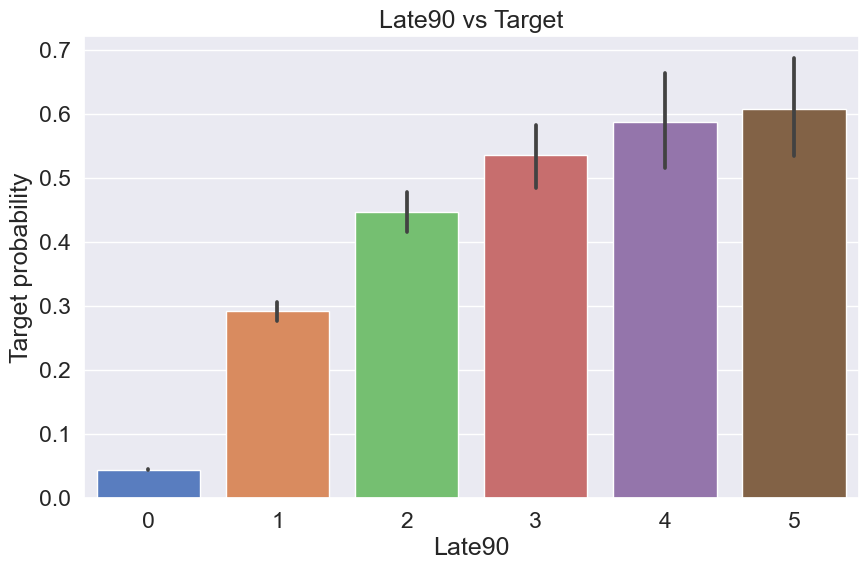

In [40]:
# Explore Late90 feature vs Target using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
g = sns.barplot(x="Late90", y="Target", data=train, palette="muted")
g.set_xlabel("Late90")
g.set_ylabel("Target probability")
plt.title("Late90 vs Target")


## Exploring PropLines

In [41]:
train.PropLines.describe()

count    146473.000000
mean          1.014139
std           1.080874
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: PropLines, dtype: float64

In [42]:
train.PropLines.describe()

count    146473.000000
mean          1.014139
std           1.080874
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: PropLines, dtype: float64

Text(0.5, 1.0, 'PropLines vs Target')

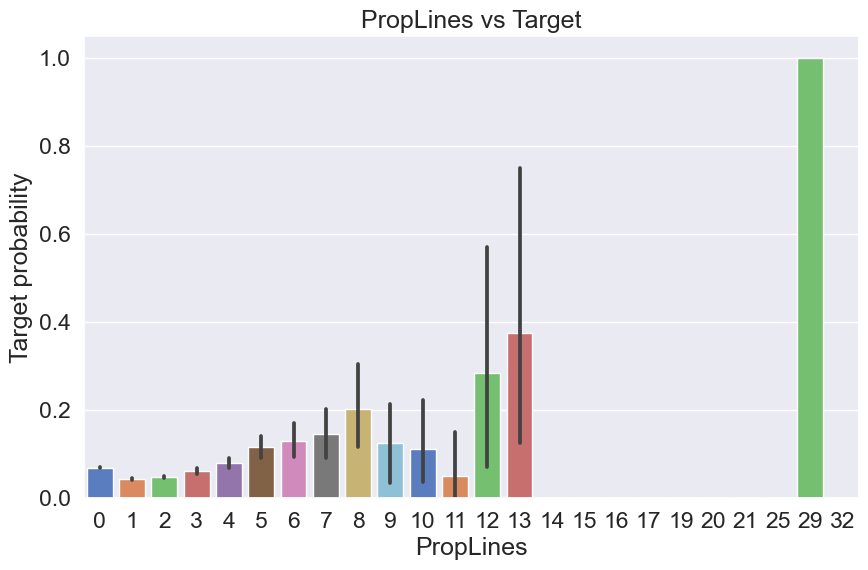

In [43]:
# Explore PropLines feature vs Target using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
g = sns.barplot(x="PropLines", y="Target", data=train, palette="muted")
g.set_xlabel("PropLines")
g.set_ylabel("Target probability")
plt.title("PropLines vs Target")


In [44]:
for i in range(len(train)):
    if train.PropLines[i] >= 6:
        train.PropLines[i] = 6

Text(0.5, 1.0, 'PropLines vs Target')

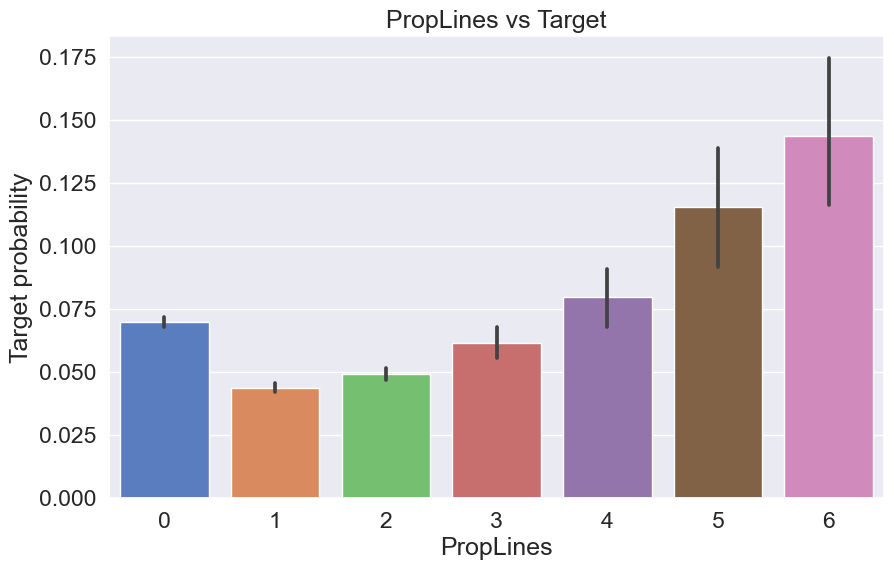

In [45]:
# Explore PropLines feature vs Target using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
g = sns.barplot(x="PropLines", y="Target", data=train, palette="muted")
g.set_xlabel("PropLines")
g.set_ylabel("Target probability")
plt.title("PropLines vs Target")


Text(0.5, 1.0, 'Late6089 vs Target')

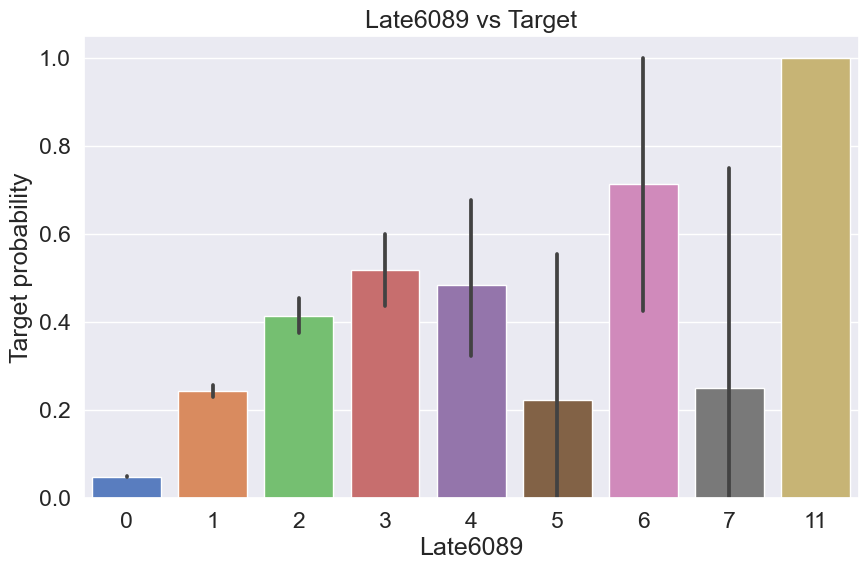

In [46]:
# Explore Late6089 feature vs Target using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
g = sns.barplot(x="Late6089", y="Target", data=train, palette="muted")
g.set_xlabel("Late6089")
g.set_ylabel("Target probability")
plt.title("Late6089 vs Target")


In [47]:
for i in range(len(train)):
    if train.Late6089[i] >= 3:
        train.Late6089[i] = 3

Text(0.5, 1.0, 'Late6089 vs Target')

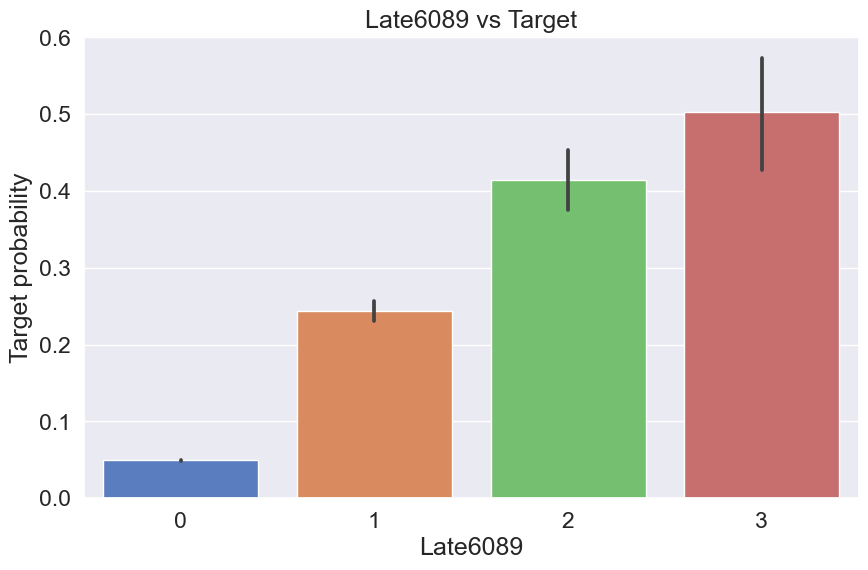

In [48]:
# Explore Late6089 feature vs Target using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
g = sns.barplot(x="Late6089", y="Target", data=train, palette="muted")
g.set_xlabel("Late6089")
g.set_ylabel("Target probability")
plt.title("Late6089 vs Target")


## Exploring Deps

In [49]:
train.Deps.describe()

count    142707.000000
mean          0.756375
std           1.113671
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: Deps, dtype: float64

In [50]:
train.Deps.isnull().sum()

3766

In [51]:
train.Deps = train.Deps.fillna(train.Deps.median())

In [52]:
train.Deps.isnull().sum()

0

Text(0.5, 1.0, 'Deps vs Target')

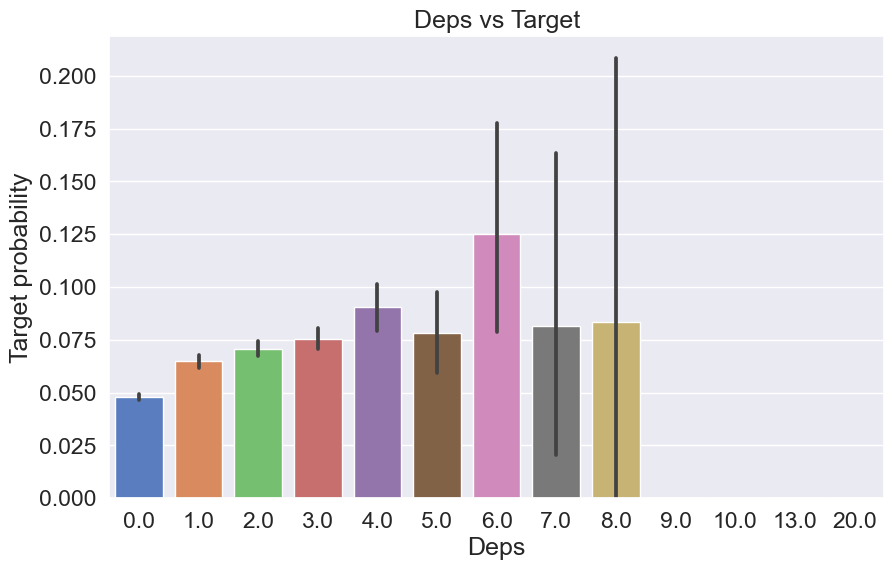

In [53]:
# Explore Deps feature vs Target using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
g = sns.barplot(x="Deps", y="Target", data=train, palette="muted")
g.set_xlabel("Deps")
g.set_ylabel("Target probability")
plt.title("Deps vs Target")


In [54]:
for i in range(len(train)):
    if train.Deps[i] >= 4:
        train.Deps[i] = 4

Text(0.5, 1.0, 'Deps vs Target')

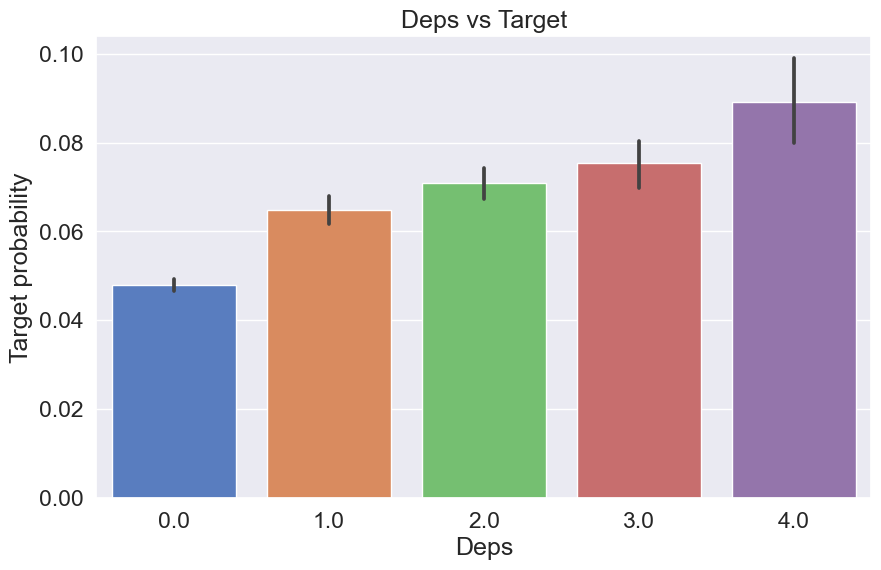

In [55]:
# Explore Deps feature vs Target using a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
g = sns.barplot(x="Deps", y="Target", data=train, palette="muted")
g.set_xlabel("Deps")
g.set_ylabel("Target probability")
plt.title("Deps vs Target")


## Final NaN check

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146473 entries, 0 to 146472
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unknown        146473 non-null  int64  
 1   Target         146473 non-null  int64  
 2   UnsecLines     146473 non-null  int8   
 3   age            146473 non-null  int8   
 4   Late3059       146473 non-null  int64  
 5   DebtRatio      146473 non-null  int8   
 6   MonthlyIncome  146473 non-null  int8   
 7   OpenCredit     146473 non-null  int8   
 8   Late90         146473 non-null  int64  
 9   PropLines      146473 non-null  int64  
 10  Late6089       146473 non-null  int64  
 11  Deps           146473 non-null  float64
dtypes: float64(1), int64(6), int8(5)
memory usage: 8.5 MB


In [57]:
train.isnull().sum()

Unknown          0
Target           0
UnsecLines       0
age              0
Late3059         0
DebtRatio        0
MonthlyIncome    0
OpenCredit       0
Late90           0
PropLines        0
Late6089         0
Deps             0
dtype: int64

**Let us Do one Hot Encoding now to Building binary/dummy variables**

## Building our credit scoring model

In [58]:
## Separate train features and label 

train["Target"] = train["Target"].astype(int)

Y_train = train["Target"]

X_train = train.drop(labels = ["Target", "Unknown"],axis = 1)

## Splitting the data in to train test & validation

In [59]:
from sklearn.model_selection import train_test_split

# Splitting the data into train (70%) and temporary (30%)
train_df, temp_df = train_test_split(train, test_size=0.3, random_state=42)

# Further splitting the temporary data into validation (15%) and test (15%)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Printing the shapes of the resulting datasets
print(f"Train data shape: {train_df.shape}")
print(f"Validation data shape: {validation_df.shape}")
print(f"Test data shape: {test_df.shape}")


Train data shape: (102531, 12)
Validation data shape: (21971, 12)
Test data shape: (21971, 12)


**Let us Do one Hot Encoding now to Building binary/dummy variables**

In [60]:
train = pd.get_dummies(train, columns = ["UnsecLines"], prefix="UnsecLines")
train = pd.get_dummies(train, columns = ["age"], prefix="age")
train = pd.get_dummies(train, columns = ["Late3059"], prefix="Late3059")
train = pd.get_dummies(train, columns = ["DebtRatio"], prefix="DebtRatio")
train = pd.get_dummies(train, columns = ["MonthlyIncome"], prefix="MonthlyIncome")
train = pd.get_dummies(train, columns = ["OpenCredit"], prefix="OpenCredit")
train = pd.get_dummies(train, columns = ["Late90"], prefix="Late90")
train = pd.get_dummies(train, columns = ["PropLines"], prefix="PropLines")
train = pd.get_dummies(train, columns = ["Late6089"], prefix="Late6089")
train = pd.get_dummies(train, columns = ["Deps"], prefix="Deps")

## Let us train our model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # You can replace this with your desired classifier

# Separate train features and labels
Y_train = train["Target"]
X_train = train.drop(labels=["Target", "Unknown"], axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8, random_state=42)

# Create and train your classifier (e.g., Random Forest)
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.94


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming you have already imported and split your data as mentioned
# Split your data into train, validation, and test sets

# Separate the features (X) and target (y) variables
X_train = train_df.drop('Target', axis=1)  # Replace 'Target' with your actual target column name
y_train = train_df['Target']

X_validation = validation_df.drop('Target', axis=1)
y_validation = validation_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)  # You can customize hyperparameters here
random_forest.fit(X_train, y_train)

# Make predictions on the validation set
validation_predictions = random_forest.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate other metrics on the validation set
validation_f1 = f1_score(y_validation, validation_predictions)
validation_precision = precision_score(y_validation, validation_predictions)
validation_recall = recall_score(y_validation, validation_predictions)

print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Precision Score: {validation_precision}")
print(f"Validation Recall Score: {validation_recall}")

# Make predictions on the test set
test_predictions = random_forest.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics on the test set
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")


Validation Accuracy: 0.9410586682445041
Validation F1 Score: 0.19113054341036853
Validation Precision Score: 0.3541666666666667
Validation Recall Score: 0.13088109495295125
Test Accuracy: 0.9349142050885257
Test F1 Score: 0.14982164090368608
Test Precision Score: 0.32061068702290074
Test Recall Score: 0.09775019394879751


In [63]:
from sklearn.metrics import confusion_matrix

# Make predictions on the validation set
validation_predictions = random_forest.predict(X_validation)

# Compute the confusion matrix
confusion = confusion_matrix(y_validation, validation_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[20523   279]
 [ 1016   153]]


**CHECK USING LOGISTIC REGRESSION**

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming you have already imported and split your data as mentioned
# Split your data into train, validation, and test sets

# Separate the features (X) and target (y) variables
X_train = train_df.drop('Target', axis=1)  # Replace 'Target' with your actual target column name
y_train = train_df['Target']

X_validation = validation_df.drop('Target', axis=1)
y_validation = validation_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

# Initialize and train the Logistic Regression model
logistic_reg = LogisticRegression(random_state=42)  # You can customize hyperparameters here
logistic_reg.fit(X_train, y_train)

# Make predictions on the validation set
validation_predictions = logistic_reg.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate other metrics on the validation set
validation_f1 = f1_score(y_validation, validation_predictions)
validation_precision = precision_score(y_validation, validation_predictions)
validation_recall = recall_score(y_validation, validation_predictions)

print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Precision Score: {validation_precision}")
print(f"Validation Recall Score: {validation_recall}")

# Make predictions on the test set
test_predictions = logistic_reg.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics on the test set
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")


Validation Accuracy: 0.9467935005234173
Validation F1 Score: 0.0
Validation Precision Score: 0.0
Validation Recall Score: 0.0
Test Accuracy: 0.9413317554958809
Test F1 Score: 0.0
Test Precision Score: 0.0
Test Recall Score: 0.0


In [65]:
from sklearn.metrics import confusion_matrix

# Make predictions on the validation set
validation_predictions = logistic_reg.predict(X_validation)

# Compute the confusion matrix
confusion = confusion_matrix(y_validation, validation_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[20802     0]
 [ 1169     0]]


**XGBOOST**

In [66]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming you have already imported and split your data as mentioned
# Split your data into train, validation, and test sets

# Separate the features (X) and target (y) variables
X_train = train_df.drop('Target', axis=1)  # Replace 'Target' with your actual target column name
y_train = train_df['Target']

X_validation = validation_df.drop('Target', axis=1)
y_validation = validation_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

# Initialize and train the XGBoost model
xgboost_model = xgb.XGBClassifier(random_state=42)  # You can customize hyperparameters here
xgboost_model.fit(X_train, y_train)

# Make predictions on the validation set
validation_predictions = xgboost_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate other metrics on the validation set
validation_f1 = f1_score(y_validation, validation_predictions)
validation_precision = precision_score(y_validation, validation_predictions)
validation_recall = recall_score(y_validation, validation_predictions)

print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Precision Score: {validation_precision}")
print(f"Validation Recall Score: {validation_recall}")

# Make predictions on the test set
test_predictions = xgboost_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics on the test set
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")


Validation Accuracy: 0.9459287242273906
Validation F1 Score: 0.16923076923076924
Validation Precision Score: 0.46360153256704983
Validation Recall Score: 0.10350727117194183
Test Accuracy: 0.9411952118701925
Test F1 Score: 0.14209827357237714
Test Precision Score: 0.4930875576036866
Test Recall Score: 0.08301008533747091


In [67]:
# Make predictions on the validation set
validation_predictions = xgboost_model.predict(X_validation)

# Compute the confusion matrix
confusion = confusion_matrix(y_validation, validation_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[20662   140]
 [ 1048   121]]


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming you have already imported and split your data as mentioned
# Split your data into train, validation, and test sets

# Separate the features (X) and target (y) variables
X_train = train_df.drop('Target', axis=1)  # Replace 'Target' with your actual target column name
y_train = train_df['Target']

X_validation = validation_df.drop('Target', axis=1)
y_validation = validation_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)  # You can customize hyperparameters here
decision_tree_model.fit(X_train, y_train)

# Make predictions on the validation set
validation_predictions = decision_tree_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate other metrics on the validation set
validation_f1 = f1_score(y_validation, validation_predictions)
validation_precision = precision_score(y_validation, validation_predictions)
validation_recall = recall_score(y_validation, validation_predictions)

print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Precision Score: {validation_precision}")
print(f"Validation Recall Score: {validation_recall}")

# Make predictions on the test set
test_predictions = decision_tree_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics on the test set
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")


Validation Accuracy: 0.9075599654089481
Validation F1 Score: 0.20007877116975187
Validation Precision Score: 0.1854014598540146
Validation Recall Score: 0.2172797262617622
Test Accuracy: 0.9020071912976196
Test F1 Score: 0.21279707495429617
Test Precision Score: 0.2012448132780083
Test Recall Score: 0.22575640031031807


In [69]:
# Make predictions on the validation set
validation_predictions = decision_tree_model.predict(X_validation)

# Compute the confusion matrix
confusion = confusion_matrix(y_validation, validation_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[19686  1116]
 [  915   254]]


In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming you have already imported and split your data as mentioned
# Split your data into train, validation, and test sets

# Separate the features (X) and target (y) variables
X_train = train_df.drop('Target', axis=1)  # Replace 'Target' with your actual target column name
y_train = train_df['Target']

X_validation = validation_df.drop('Target', axis=1)
y_validation = validation_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

# Initialize and train the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)  # You can customize hyperparameters here
adaboost_model.fit(X_train, y_train)

# Make predictions on the validation set
validation_predictions = adaboost_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate other metrics on the validation set
validation_f1 = f1_score(y_validation, validation_predictions)
validation_precision = precision_score(y_validation, validation_predictions)
validation_recall = recall_score(y_validation, validation_predictions)

print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Precision Score: {validation_precision}")
print(f"Validation Recall Score: {validation_recall}")

# Make predictions on the test set
test_predictions = adaboost_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics on the test set
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")


Validation Accuracy: 0.9462473260206636
Validation F1 Score: 0.21003344481605352
Validation Precision Score: 0.4815950920245399
Validation Recall Score: 0.1343028229255774
Test Accuracy: 0.9411496973282963
Test F1 Score: 0.20528580208973574
Test Precision Score: 0.4940828402366864
Test Recall Score: 0.1295577967416602


In [71]:
# Make predictions on the validation set
validation_predictions = adaboost_model.predict(X_validation)

# Compute the confusion matrix
confusion = confusion_matrix(y_validation, validation_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[20633   169]
 [ 1012   157]]


In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming you have already imported and split your data as mentioned
# Split your data into train, validation, and test sets

# Separate the features (X) and target (y) variables
X_train = train_df.drop('Target', axis=1)  # Replace 'Target' with your actual target column name
y_train = train_df['Target']

X_validation = validation_df.drop('Target', axis=1)
y_validation = validation_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

# Initialize and train the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the validation set
validation_predictions = naive_bayes_model.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate other metrics on the validation set
validation_f1 = f1_score(y_validation, validation_predictions)
validation_precision = precision_score(y_validation, validation_predictions)
validation_recall = recall_score(y_validation, validation_predictions)

print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Precision Score: {validation_precision}")
print(f"Validation Recall Score: {validation_recall}")

# Make predictions on the test set
test_predictions = naive_bayes_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics on the test set
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")


Validation Accuracy: 0.9467479859815211
Validation F1 Score: 0.03305785123966943
Validation Precision Score: 0.4878048780487805
Validation Recall Score: 0.01710863986313088
Test Accuracy: 0.9419689590824268
Test F1 Score: 0.042073628850488355
Test Precision Score: 0.6666666666666666
Test Recall Score: 0.021722265321955005


In [73]:
# Make predictions on the validation set
validation_predictions = naive_bayes_model.predict(X_validation)

# Compute the confusion matrix
confusion = confusion_matrix(y_validation, validation_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[20781    21]
 [ 1149    20]]


In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Assuming you have already imported and split your data as mentioned
# Split your data into train, validation, and test sets

# Separate the features (X) and target (y) variables
X_train = train_df.drop('Target', axis=1)  # Replace 'Target' with your actual target column name
y_train = train_df['Target']

X_validation = validation_df.drop('Target', axis=1)
y_validation = validation_df['Target']

X_test = test_df.drop('Target', axis=1)
y_test = test_df['Target']

# Initialize and train the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can customize the kernel and other hyperparameters
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
validation_predictions = svm_classifier.predict(X_validation)

# Calculate the accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, validation_predictions)
print(f"Validation Accuracy: {validation_accuracy}")

# Calculate other metrics on the validation set
validation_f1 = f1_score(y_validation, validation_predictions)
validation_precision = precision_score(y_validation, validation_predictions)
validation_recall = recall_score(y_validation, validation_predictions)

print(f"Validation F1 Score: {validation_f1}")
print(f"Validation Precision Score: {validation_precision}")
print(f"Validation Recall Score: {validation_recall}")

# Make predictions on the test set
test_predictions = svm_classifier.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

# Calculate other metrics on the test set
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)

print(f"Test F1 Score: {test_f1}")
print(f"Test Precision Score: {test_precision}")
print(f"Test Recall Score: {test_recall}")


Validation Accuracy: 0.9468390150653133
Validation F1 Score: 0.0017094017094017092
Validation Precision Score: 1.0
Validation Recall Score: 0.000855431993156544
Test Accuracy: 0.9413317554958809
Test F1 Score: 0.0
Test Precision Score: 0.0
Test Recall Score: 0.0


In [75]:
# Make predictions on the validation set
validation_predictions = naive_bayes_model.predict(X_validation)

# Compute the confusion matrix
confusion = confusion_matrix(y_validation, validation_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[20781    21]
 [ 1149    20]]


## Let us Check Varriable Importance

In [76]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [102531, 29294]

In [ ]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

In [ ]:
features.plot(kind='barh', figsize=(20, 20))

In [ ]:
parameters = {'n_estimators': 1000, 'random_state' : 20}
    
model = RandomForestClassifier(**parameters)
model.fit(X_train, Y_train)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.ensemble import RandomForestClassifier  # You can replace this with your desired classifier

# # Separate train features and labels
# Y_train = train["Target"]
# X_train = train.drop(labels=["Target", "Unknown"], axis=1)

# # Split the data into training and testing sets (optional)
# # X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8, random_state=42)

# # Create and train your classifier (e.g., Random Forest)
# classifier = RandomForestClassifier()
# classifier.fit(X_train, Y_train)

# # Make predictions on the train set (optional)
# # Y_pred = classifier.predict(X_train)

# # Calculate predicted probabilities for default
# DefaultProba = classifier.predict_proba(X_train)[:, 1]
# train["Target"] = DefaultProba

# # Rename columns
# results_df = train.rename(columns={'Unnamed: 0': 'Id', 'Target': 'Probability'})

# # Print or further process the results_df DataFrame as needed
# # print(results_df.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # You can replace this with your desired classifier

# Separate train features and labels
Y_train = train["Target"]
X_train = train.drop(labels=["Target", "Unknown"], axis=1)

# Split the data into training and testing sets (optional)
# X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.8, random_state=42)

# Create and train your classifier (e.g., Random Forest)
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

# Calculate predicted probabilities for both classes
predicted_probabilities = classifier.predict_proba(X_train)

# Extract and store the probabilities for class 0 and class 1 in separate columns
train["Probability_0"] = predicted_probabilities[:, 0]  # Probability for class 0
train["Probability_1"] = predicted_probabilities[:, 1]  # Probability for class 1

# Rename columns
results_df = train.rename(columns={'Unnamed: 0': 'Id', 'Target': 'Probability'})

# Print or further process the results_df DataFrame as needed
# print(results_df.head())


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming you already have the predicted probabilities for both classes: class_0_probabilities and class_1_probabilities

# Set a threshold for binary classification (you can adjust this threshold)
threshold = 0.5  # Example threshold; you can choose a different value

# Convert probabilities to binary predictions based on the threshold
binary_predictions = [1 if prob >= threshold else 0 for prob in class_1_probabilities]

# Calculate accuracy
accuracy = accuracy_score(Y_test, binary_predictions)

# Calculate precision
precision = precision_score(Y_test, binary_predictions)

# Calculate recall
recall = recall_score(Y_test, binary_predictions)

# Calculate F1-score
f1 = f1_score(Y_test, binary_predictions)

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, class_1_probabilities)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(Y_test, class_1_probabilities)

# Print or use the calculated metrics as needed
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# You can also plot the ROC curve if desired
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion = confusion_matrix(Y_test, binary_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Calculate and print True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = confusion.ravel()
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")


In [ ]:
# Separate the actual labels from the predicted probabilities
y_true = Y_test
y_probabilities = classifier.predict_proba(X_test)[:, 1]  # Probability for class 1

# Calculate Log Loss, Brier Score, ROC AUC, and AUC-PR on the test set
logloss = log_loss(y_true, y_probabilities)
brier_score = brier_score_loss(y_true, y_probabilities)
roc_auc = roc_auc_score(y_true, y_probabilities)
auc_pr = average_precision_score(y_true, y_probabilities)

print(f"Log Loss: {logloss:.4f}")
print(f"Brier Score: {brier_score:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")


In [ ]:
# Keep only the "Unknown" and "Probability" columns
result_df = results_df[["Unknown", "Probability_0","Probability_1"]]

# Rename the "Unknown" column to "Id"
result_df = result_df.rename(columns={"Unknown": "Id"})

# Print or further process the result_df DataFrame as needed
print(result_df.head())


In [ ]:
result_df.shape

In [ ]:
CREDIT_SCORE=result_df

In [ ]:
CREDIT_SCORE.to_excel("CREDIT_SCORE.xlsx", index=True)
